In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam as adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import sys
sys.tracebacklimit = 0

Let's download the dataframe:

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

n_train, h, w, n_chan = tuple(train_x.shape)

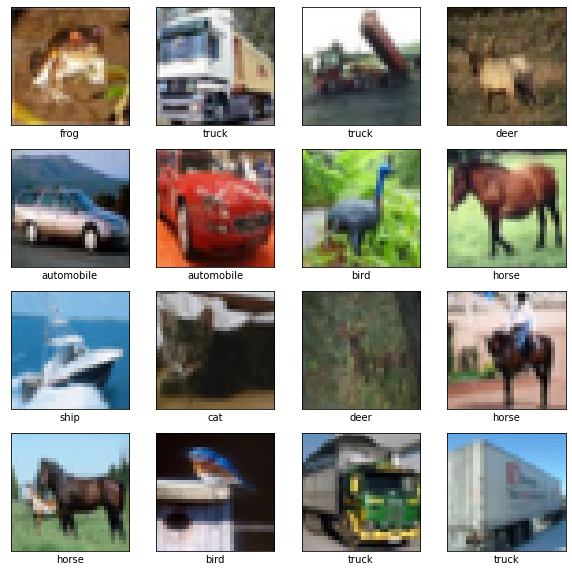

In [4]:
n_plot = 4  # set number of nodes per axis

plt.figure(figsize=(10,10))
for i in range(n_plot**2):
    plt.subplot(n_plot,n_plot,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

And normalise the dependent variables, subtracting the mean brightness from each channel following scaling.

In [5]:
train_x, test_x = (train_x/255 - .5, test_x/255 - .5)

Now we can begin assembling our model.

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(50, 2, activation='relu', input_shape=(h, w, n_chan)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.1),
    
    keras.layers.Conv2D(100, 2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.3),
    
    keras.layers.Conv2D(400, 2, activation='relu'),
    keras.layers.Dropout(.3),

    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(len(class_names), activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 31, 31, 50)        650       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 50)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 100)       20100     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 100)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 100)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 400)        

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 7s 149us/sample - loss: 1.9214 - accuracy: 0.4229 - val_loss: 1.8293 - val_accuracy: 0.5207
Epoch 2/40
50000/50000 [==============================] - 7s 142us/sample - loss: 1.8093 - accuracy: 0.5505 - val_loss: 1.7723 - val_accuracy: 0.6013
Epoch 3/40
50000/50000 [==============================] - 7s 140us/sample - loss: 1.7645 - accuracy: 0.6067 - val_loss: 1.7409 - val_accuracy: 0.6319
Epoch 4/40
50000/50000 [==============================] - 7s 141us/sample - loss: 1.7348 - accuracy: 0.6411 - val_loss: 1.7297 - val_accuracy: 0.6492
Epoch 5/40
50000/50000 [==============================] - 7s 141us/sample - loss: 1.7119 - accuracy: 0.6685 - val_loss: 1.7092 - val_accuracy: 0.6757
Epoch 6/40
50000/50000 [==============================] - 7s 141us/sample - loss: 1.6951 - accuracy: 0.6898 - val_loss: 1.7057 - val_accuracy: 0.6836
Epoch 7/40
50000/50000 [==========================

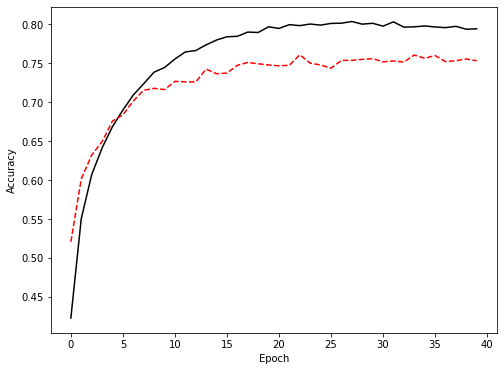

In [14]:
history = model.fit(train_x, train_y, epochs=40, 
                    validation_data=(test_x, test_y), verbose=1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['accuracy'], 'k', label='accuracy')
ax.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend

fig.show()